## Jupyter Notebooks

In this section, we continue explaining conditionals, loops and functions using Jupyter notebooks.

- IPython is a kernel behind Jupyter notebooks that makes working interactively convenient and efficient.
- It is the way to go when is about Scientific Computing and Data Mining
- Allows to combine codes with text through `MarkDown` language and $\LaTeX$

For example, some repositories with Jupyter notebooks are:

- https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks
- https://nbviewer.jupyter.org/



## Fit

Test Fit-Algorithmus form scipy

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Test how to generate a simple 1D array and plot it 

In [46]:
test_data = np.linspace(0, 4, 50)
test_data
test_data.shape

(50,)

In [47]:
#zum Plotten
x_werte = np.arange(50, dtype=float)
x_werte
x_werte.shape

(50,)

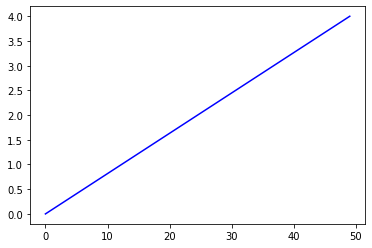

In [48]:
plt.plot(x_werte, test_data, 'b-')

How to generate a 1D Array from a mathematic function and plot it

In [49]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [50]:
y_werte = func(x_werte, 2.5, 1.3, 0.5)
y_werte
y_werte.shape

(50,)

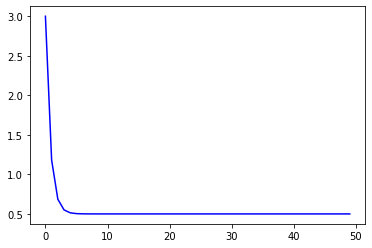

In [51]:
plt.plot(x_werte, y_werte, 'b-')

How to create a noisy data of that funtion

In [52]:
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=x_werte.size)
y_werte_noisy= y_werte + y_noise

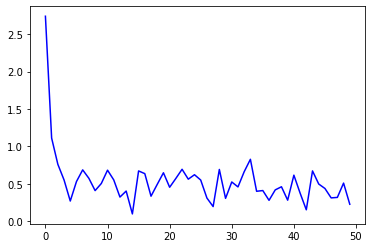

In [53]:
plt.plot(x_werte, y_werte_noisy, 'b-')

How to fit noisy 1D data to function

In [54]:
popt, pcov = curve_fit(func, x_werte, y_werte_noisy)
#die neu gefitteten parameter werte von a, b, c
popt

array([2.26205941, 1.20319551, 0.47179949])

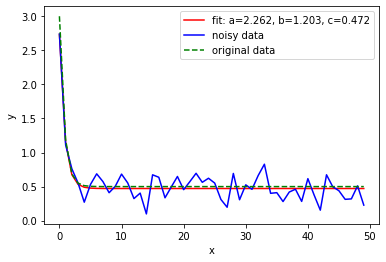

In [55]:
plt.plot(x_werte, func(x_werte, *popt), 'r-',
    label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(x_werte, y_werte_noisy, 'b-',label="noisy data")
plt.plot(x_werte, y_werte, 'g--', label="original data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

How to fit noisy 1D data to fit with boundaries

In [56]:
popt_bound, pcov = curve_fit(func, x_werte, y_werte_noisy, bounds=(0, [3.0, 1.0, 0.5]))
#new parameters
popt_bound

array([2.20592418, 1.        , 0.46665689])

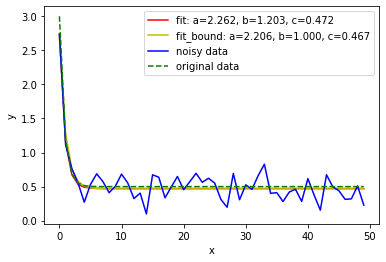

In [58]:
plt.plot(x_werte, func(x_werte, *popt), 'r-',
    label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(x_werte, func(x_werte, *popt_bound), 'y-',
    label='fit_bound: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_bound))
plt.plot(x_werte, y_werte_noisy, 'b-',label="noisy data")
plt.plot(x_werte, y_werte, 'g--', label="original data")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Interesting Observation: X-Werte beeinflussen den Fit genauso wie Y-Werte, deshalb ist es wichtig, dass X-Werte den gleichen genauen Datentyp haben. 